C:\Users\fekur\AppData\Local\Temp\ipykernel_45860\2484653423.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [0, 0, 1]], dtype = np.float)


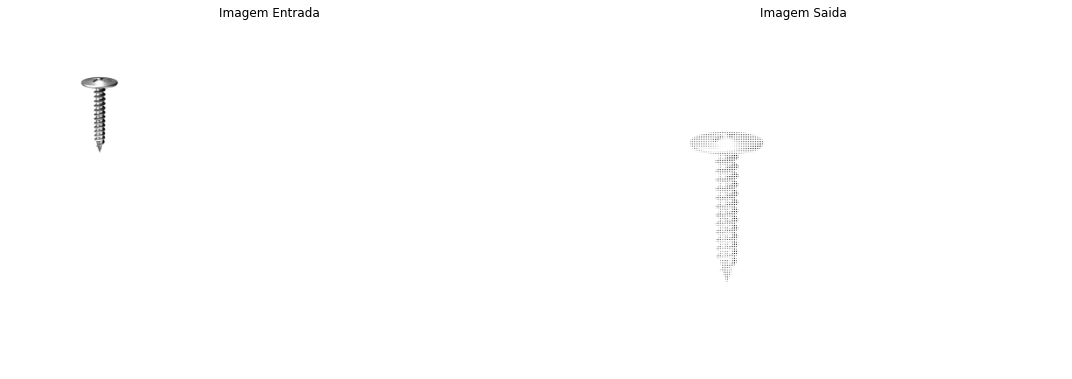

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_in = cv2.imread("figuras_aula8/screw_u8.bmp", cv2.IMREAD_GRAYSCALE)
(h, w) = img_in.shape
TH = np.array( [[2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]], dtype = np.float)
#Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
img_out = np.ones( (h,w), dtype = np.uint8) * 255 # com um imagem de fundo branco
#varredura da imagem
for x in range(w): # varrendo as colunas (horizontais), o que corresponde a X
    for y in range(h): # varrendo as linhas (verticais), o que corresponde a Y
        p0=np.array([ [x], [y], [1] ]) # montagem do vetor coluna P0 (x,y,1)
        p1=np.matmul(TH,p0) # calculo do vetor coluna P1 (u,v,1)
        u=int(p1[0][0]) #--> eh mandatório converter u,v para int, pois serão usadas como indexes da matriz img_out
        v=int(p1[1][0]) #--> eh mandatório converter u,v para int, pois serão usadas como indexes da matriz img_out
        if (u>=0) and (u<w) and (v>=0) and (v<h):
            img_out[v,u] = img_in[y,x] #--> Y e V sao as linhas; X e U sao as colunas

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(img_in, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_out, cmap='gray')
plt.title('Imagem Saida')
plt.axis('off')
plt.tight_layout()
plt.show()

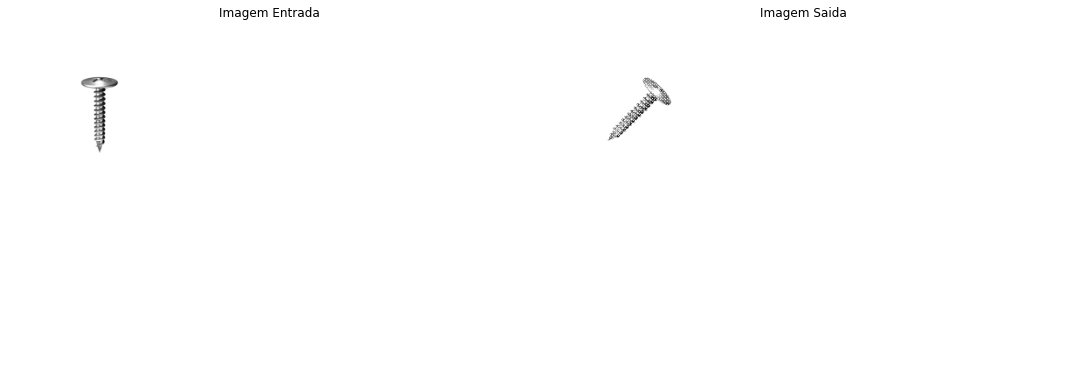

In [11]:
TH = np.array( [[1, 0, -106],
            [0, 1, -106],
            [0, 0, 1]], dtype = np.float32)

theta = 45*np.pi/180

TH2=np.array( [[np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]], dtype = np.float32)

TH3=np.array( [[1, 0, 106],
    [0, 1, 106],
    [0, 0, 1]], dtype = np.float32)

TH13=np.matmul(TH3,np.matmul(TH2,TH))

#Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
img_out = np.ones( (h,w), dtype = np.uint8) * 255 # com um imagem de fundo branco
#varredura da imagem
for x in range(w): # varrendo as colunas (horizontais), o que corresponde a X
    for y in range(h): # varrendo as linhas (verticais), o que corresponde a Y
        p0=np.array([ [x], [y], [1] ]) # montagem do vetor coluna P0 (x,y,1)
        p1=np.matmul(TH13,p0) # calculo do vetor coluna P1 (u,v,1)
        u=int(p1[0][0]) #--> eh mandatório converter u,v para int, pois serão usadas como indexes da matriz img_out
        v=int(p1[1][0]) #--> eh mandatório converter u,v para int, pois serão usadas como indexes da matriz img_out
        if (u>=0) and (u<w) and (v>=0) and (v<h):
            img_out[v,u] = img_in[y,x] #--> Y e V sao as linhas; X e U sao as colunas

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(img_in, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_out, cmap='gray')
plt.title('Imagem Saida')
plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\fekur\AppData\Local\Temp\ipykernel_45860\185161159.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [0, 0, 1]], dtype = np.float)


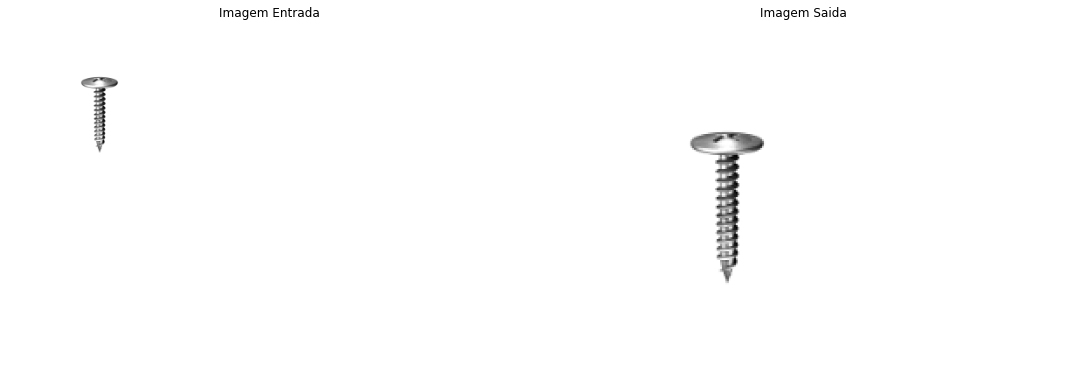

In [ ]:
TH = np.array( [[2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]], dtype = np.float)

TH_inv=np.linalg.inv(TH)
#Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
img_out = np.ones( (h,w), dtype = np.uint8) * 255 # com um imagem de fundo branco
#varredura da imagem
for u in range(w): # varrendo as colunas (horizontais), o que corresponde a X
    for v in range(h): # varrendo as linhas (verticais), o que corresponde a Y
        p1=np.array([ [u], [v], [1] ]) # montagem do vetor coluna P0 (x,y,1)
        p0=np.matmul(TH_inv,p1) # calculo do vetor coluna P1 (u,v,1)
        x=int(p0[0]) 
        y=int(p0[1]) 
        if (x>=0) and (x<w) and (y>=0) and (y<h):
            img_out[v,u] = img_in[y,x] #--> Y e V sao as linhas; X e U sao as colunas

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(img_in, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_out, cmap='gray')
plt.title('Imagem Saida')
plt.axis('off')
plt.tight_layout()
plt.show()